In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score


In [ ]:
df = pd.read_csv('crop_recommendation.csv')

In [ ]:
df.head(25)

,N,P,K,temperature,humidity,ph,rainfall,label
0,77,49,42,20.879744,82.002744,6.502985,202.935536,rice
1,89,55,41,21.770462,80.319644,7.038096,226.655537,rice
2,98,56,37,23.004459,82.320763,7.840207,263.964248,rice
3,78,41,42,26.491096,80.158363,6.980401,242.864034,rice
4,81,42,37,20.130175,81.604873,7.628473,262.717340,rice
5,84,47,35,23.058049,83.370118,7.073454,251.055000,rice
6,97,41,40,22.708838,82.639414,5.700806,271.324860,rice
7,90,40,35,20.277744,82.894086,5.718627,241.974195,rice
8,96,47,42,24.515881,83.535216,6.685346,230.446236,rice
9,100,50,36,23.223974,83.033227,6.336254,221.209196,rice


In [ ]:
df.sample(20)

,N,P,K,temperature,humidity,ph,rainfall,label
1811,10,15,32,28.272981,96.936495,6.070718,198.823486,coconut
832,1,57,19,21.318521,66.439346,7.320515,45.426168,lentil
308,34,67,17,18.416700,23.428299,5.689858,132.980105,kidneybeans
672,20,40,17,28.445250,82.676395,6.684381,58.187132,mungbean
456,21,75,19,30.504209,35.488860,5.391560,162.592772,pigeonpeas
1704,64,51,48,42.923253,90.076005,6.938313,196.240824,papaya
1089,108,81,49,27.197116,77.397063,6.200111,99.469505,banana
1865,20,29,30,28.842710,99.643285,6.218572,224.401668,coconut
661,2,42,21,29.730130,82.891664,6.442336,50.915113,mungbean
610,32,47,16,29.530376,86.733460,7.156563,59.872321,mungbean


In [ ]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,106,19,35,26.774637,66.413269,6.780064,177.774507,coffee
2196,88,35,32,27.417112,56.636362,6.086922,127.924610,coffee
2197,85,16,34,24.131797,67.225123,6.362608,173.322839,coffee
2198,100,37,30,26.272418,52.127394,6.758793,127.175293,coffee
2199,90,27,31,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.235161,-0.157387,0.010753,0.190405,0.096163,0.072959
P,-0.235161,1.000000,0.741227,-0.126735,-0.120916,-0.143681,-0.068502
K,-0.157387,0.741227,1.000000,-0.160601,0.188868,-0.167730,-0.055629
temperature,0.010753,-0.126735,-0.160601,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190405,-0.120916,0.188868,0.205320,1.000000,-0.008483,0.094423
ph,0.096163,-0.143681,-0.167730,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.072959,-0.068502,-0.055629,-0.030084,0.094423,-0.109069,1.000000


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.605909,53.258636,48.190455,25.616244,71.481779,6.469480,103.463655
std,37.766325,32.873189,50.681043,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,20.000000,28.000000,21.000000,22.769375,60.261953,5.971693,64.551686
50%,36.000000,50.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,86.000000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


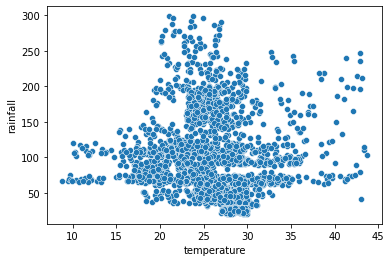

In [ ]:
sns.scatterplot( df['temperature'], df['rainfall'])# values concentrated at 25-150 range

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


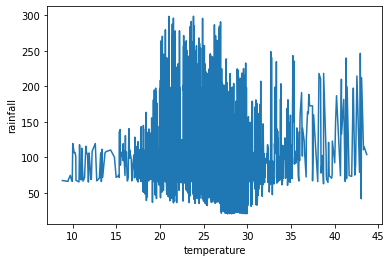

In [ ]:
sns.lineplot( df['temperature'], df['rainfall'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


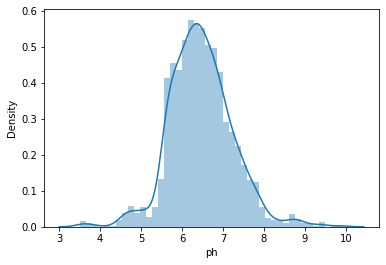

In [ ]:
sns.distplot( df['ph'])

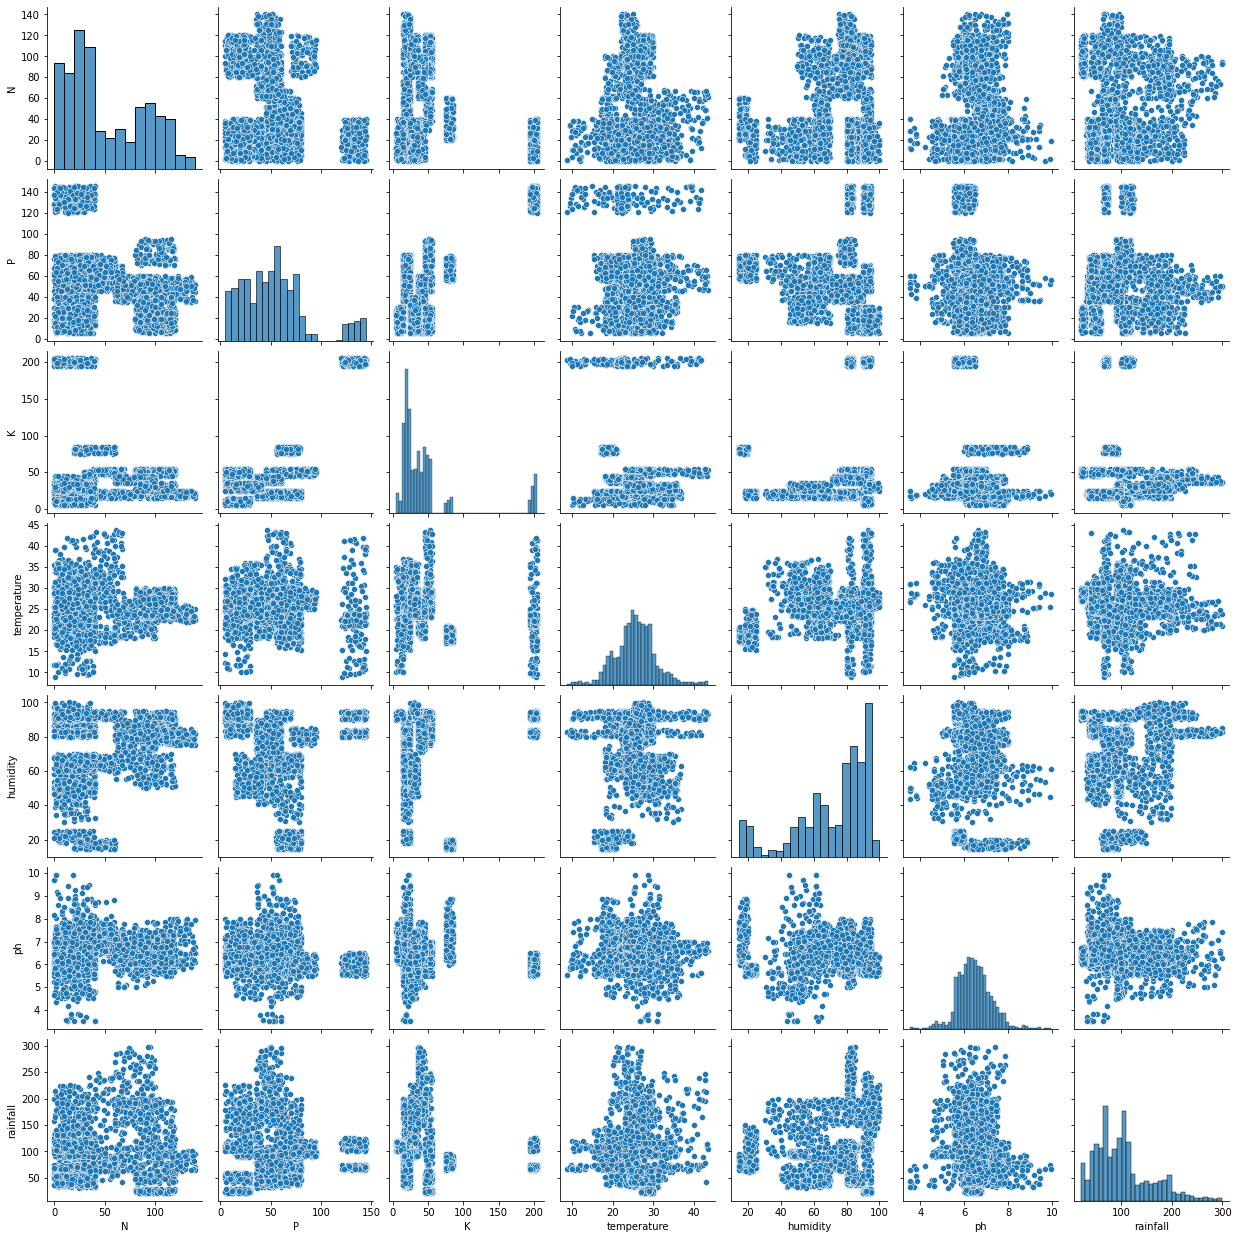

In [ ]:
sns.pairplot(df)

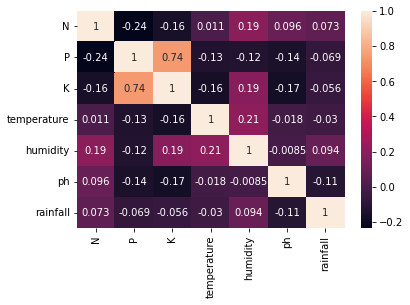

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#accuracy and model name
acc = []
model = []
# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('Decision Tree')         #model name
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.68181818181819
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.64      1.00      0.78        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.21      0.35        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       0.92      1.00      0.96        23
       maize       0.83      0.95      0.89        21
       mango       1.00      0.85      0.92        26
   mothbeans       1.00      0.47      0.64        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00

In [ ]:
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.92954545, 0.91136364, 0.91818182, 0.93409091, 0.94090909])

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
X_test_norm = norm.transform(Xtest)

SVM = SVC(C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('SVM')                   #model name
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9772727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.96      0.90        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       0.93      1.00      0.96        26
   mothbeans       1.00      0.84      0.91        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

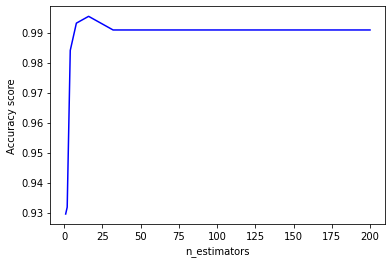

In [ ]:
from sklearn.ensemble import RandomForestClassifier
acc_score = []
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
for i in n_estimators:
    RF = RandomForestClassifier(n_estimators=i, random_state=2)
    RF.fit(Xtrain,Ytrain)
    predicted_values = RF.predict(Xtest)

    x = metrics.accuracy_score(Ytest, predicted_values)
    acc_score.append(x) 
    
plt.plot(n_estimators, acc_score, 'b', label='Accuracy')
plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
acc_score

[0.9295454545454546,
 0.9318181818181818,
 0.9840909090909091,
 0.9931818181818182,
 0.9954545454545455,
 0.990909090909091,
 0.990909090909091,
 0.990909090909091,
 0.990909090909091]

In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('Naive Bayes')           #model name
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 

In [ ]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99545455, 0.99545455, 0.99318182, 0.99090909, 0.99090909])

In [ ]:
RF = RandomForestClassifier(n_estimators=16, random_state=2)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('RF')                   #model name
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.97      1.00      0.98        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [ ]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99545455, 1.        , 0.99090909, 0.99545455, 0.98636364])

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)


Decision Tree --> 0.9068181818181819
SVM --> 0.9772727272727273
Naive Bayes --> 0.9886363636363636
RF --> 0.9954545454545455


In [ ]:
#['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
data = np.array([[23,67,59,78,34,5.6,150]])##### prediction on sample
prediction = RF.predict(data)
print(prediction)

['pigeonpeas']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('Decision Tree', DecisionTree), ('Random Forest', RF)], 
                       voting='soft', weights=[1,1]).fit(Xtrain,Ytrain)
print('The accuracy for DecisionTree and Random Forest is:',ensemble.score(Xtest,Ytest))

The accuracy for DecisionTree and Random Forest is: 0.9818181818181818


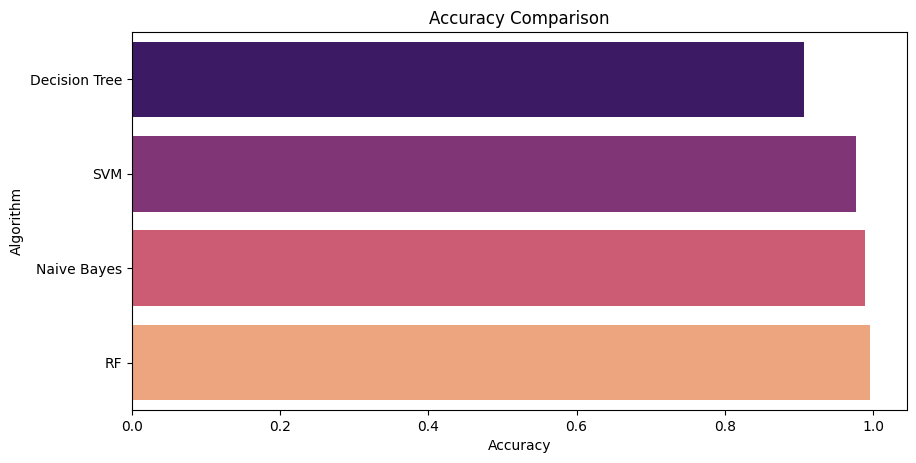

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='magma')

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [ ]:
state = 12
test_size = 0.30

Xtrain, X_val, Ytrain, y_val = train_test_split(Xtrain, Ytrain,
                                                  test_size=test_size, random_state=state)

In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(
        n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(Xtrain, Ytrain)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(
        gb_clf.score(Xtrain, Ytrain)))
    print("Accuracy score (validation): {0:.3f}".format(
        gb_clf.score(X_val, y_val)))


Learning rate:  0.05
Accuracy score (training): 0.981
Accuracy score (validation): 0.972
Learning rate:  0.075
Accuracy score (training): 0.990
Accuracy score (validation): 0.979
Learning rate:  0.1
Accuracy score (training): 0.994
Accuracy score (validation): 0.977
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.992
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.981
Learning rate:  0.75
Accuracy score (training): 0.113
Accuracy score (validation): 0.091
Learning rate:  1
Accuracy score (training): 0.024
Accuracy score (validation): 0.030


In [ ]:
gb_clf2 = GradientBoostingClassifier(
    n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(Xtrain, Ytrain)
predictions = gb_clf2.predict(X_val)

#print("Confusion Matrix:")
#print(confusion_matrix(y_val, predictions))

print("Classification Report")
print(classification_report(y_val, predictions))


Classification Report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        25
      banana       1.00      1.00      1.00        29
   blackgram       1.00      1.00      1.00        29
    chickpea       1.00      1.00      1.00        25
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        18
      cotton       0.96      1.00      0.98        25
      grapes       1.00      1.00      1.00        26
        jute       0.92      0.81      0.86        27
 kidneybeans       1.00      1.00      1.00        32
      lentil       1.00      0.93      0.96        28
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        23
   mothbeans       1.00      1.00      1.00        21
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        20
      orange       0.92      1.00      0.96        22
     

In [ ]:
from xgboost import XGBClassifier


In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(Xtrain, Ytrain)

XGBClassifier(objective='multi:softprob')

In [ ]:
score = xgb_clf.score(X_val, y_val)
print(score)

0.9848484848484849


In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
df = pd.read_csv('apy.csv',encoding='utf-8')
df
#Dataset 2 used 

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899


In [ ]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production        object
dtype: object

In [ ]:
df = df[df['State_Name'] == "Andhra Pradesh"]


In [ ]:
df['Production'] = pd.to_numeric(df['Production'],errors = 'coerce')
df['State_Name'] = pd.to_numeric(df['State_Name'],errors = 'coerce')
df['District_Name'] = pd.to_numeric(df['District_Name'],errors = 'coerce')
df['District_Name'] = pd.to_numeric(df['District_Name'],errors = 'coerce')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9628 entries, 203 to 9830
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     0 non-null      float64
 1   District_Name  0 non-null      float64
 2   Crop_Year      9628 non-null   int64  
 3   Season         9628 non-null   object 
 4   Crop           9628 non-null   object 
 5   Area           9628 non-null   float64
 6   Production     9561 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 601.8+ KB
None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df['Yield'] = df['Production']/df['Area']
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
203,NaN,NaN,1997,Kharif,Arhar/Tur,21400.0,2600.0,0.121495
204,NaN,NaN,1997,Kharif,Bajra,1400.0,500.0,0.357143
205,NaN,NaN,1997,Kharif,Castor seed,1000.0,100.0,0.100000
206,NaN,NaN,1997,Kharif,Cotton(lint),7300.0,9400.0,1.287671
207,NaN,NaN,1997,Kharif,Dry chillies,3700.0,7100.0,1.918919
...,...,...,...,...,...,...,...,...
9826,NaN,NaN,2014,Rabi,Tobacco,28046.0,89107.0,3.177173
9827,NaN,NaN,2014,Rabi,Tomato,224.0,3035.0,13.549107
9828,NaN,NaN,2014,Rabi,Urad,5418.0,4833.0,0.892027
9829,NaN,NaN,2014,Whole Year,Coconut,21729.0,718991000.0,33089.005477


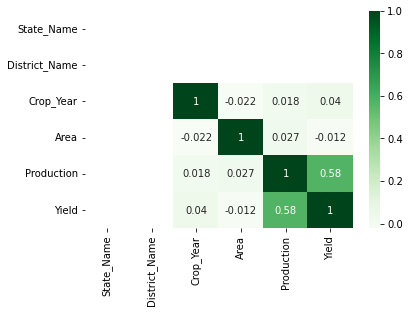

In [ ]:
sns.heatmap(df.corr(),annot=True, cmap="Greens")

In [ ]:
df = df[df['Crop_Year']>=2004]
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
493,NaN,NaN,2004,Kharif,Arhar/Tur,32752.0,7893.0,0.240993
494,NaN,NaN,2004,Kharif,Bajra,1021.0,403.0,0.394711
495,NaN,NaN,2004,Kharif,Castor seed,1578.0,923.0,0.584918
496,NaN,NaN,2004,Kharif,Cotton(lint),8933.0,7041.0,0.788201
497,NaN,NaN,2004,Kharif,Dry chillies,3402.0,11288.0,3.318048
...,...,...,...,...,...,...,...,...
9826,NaN,NaN,2014,Rabi,Tobacco,28046.0,89107.0,3.177173
9827,NaN,NaN,2014,Rabi,Tomato,224.0,3035.0,13.549107
9828,NaN,NaN,2014,Rabi,Urad,5418.0,4833.0,0.892027
9829,NaN,NaN,2014,Whole Year,Coconut,21729.0,718991000.0,33089.005477


In [ ]:
df = df.join(pd.get_dummies(df['District_Name']))
df = df.join(pd.get_dummies(df['Season']))
df = df.join(pd.get_dummies(df['Crop']))
df = df.join(pd.get_dummies(df['Crop_Year']))
df = df.join(pd.get_dummies(df['State_Name']))
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield,Kharif,Rabi,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
493,NaN,NaN,2004,Kharif,Arhar/Tur,32752.0,7893.0,0.240993,1,0,...,0,0,0,0,0,0,0,0,0,0
494,NaN,NaN,2004,Kharif,Bajra,1021.0,403.0,0.394711,1,0,...,0,0,0,0,0,0,0,0,0,0
495,NaN,NaN,2004,Kharif,Castor seed,1578.0,923.0,0.584918,1,0,...,0,0,0,0,0,0,0,0,0,0
496,NaN,NaN,2004,Kharif,Cotton(lint),8933.0,7041.0,0.788201,1,0,...,0,0,0,0,0,0,0,0,0,0
497,NaN,NaN,2004,Kharif,Dry chillies,3402.0,11288.0,3.318048,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9826,NaN,NaN,2014,Rabi,Tobacco,28046.0,89107.0,3.177173,0,1,...,0,0,0,0,0,0,0,0,0,1
9827,NaN,NaN,2014,Rabi,Tomato,224.0,3035.0,13.549107,0,1,...,0,0,0,0,0,0,0,0,0,1
9828,NaN,NaN,2014,Rabi,Urad,5418.0,4833.0,0.892027,0,1,...,0,0,0,0,0,0,0,0,0,1
9829,NaN,NaN,2014,Whole Year,Coconut,21729.0,718991000.0,33089.005477,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df=df.drop('District_Name', axis=1)
df = df.drop('Season',axis=1)
df = df.drop('Crop',axis=1)
df = df.drop('Crop_Year', axis=1)
df = df.drop('Production', axis=1)
df = df.drop('State_Name', axis=1)
df

,Area,Yield,Kharif,Rabi,Whole Year,Arecanut,Arhar/Tur,Bajra,Banana,Brinjal,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
493,32752.0,0.240993,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
494,1021.0,0.394711,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
495,1578.0,0.584918,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,8933.0,0.788201,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,3402.0,3.318048,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9826,28046.0,3.177173,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9827,224.0,13.549107,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9828,5418.0,0.892027,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9829,21729.0,33089.005477,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn import preprocessing
# Create x, where x the 'scores' column's values as floats
x = df[['Area']].values.astype(float)
x
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
x_scaled

df['Area'] = x_scaled
df

,Area,Yield,Kharif,Rabi,Whole Year,Arecanut,Arhar/Tur,Bajra,Banana,Brinjal,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
493,0.037343,0.240993,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
494,0.001163,0.394711,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
495,0.001798,0.584918,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0.010184,0.788201,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0.003878,3.318048,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9826,0.031977,3.177173,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9827,0.000254,13.549107,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9828,0.006177,0.892027,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9829,0.024775,33089.005477,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df = df.fillna(df.mean())

from sklearn.model_selection import train_test_split
b = df['Yield']
a = df.drop('Yield', axis = 1)

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.3, random_state = 42)

print(a_train)
print(a_test)
print(b_train)
print(b_test)

          Area  Kharif       Rabi         Whole Year   Arecanut  Arhar/Tur  \
1711  0.000246            0            1            0         0          0   
5452  0.031408            0            0            1         0          0   
538   0.003756            1            0            0         0          0   
2336  0.014880            0            0            1         0          0   
2172  0.001397            1            0            0         0          0   
...        ...          ...          ...          ...       ...        ...   
6278  0.001999            1            0            0         0          0   
8796  0.000129            1            0            0         0          0   
8831  0.000385            1            0            0         0          0   
8995  0.000344            0            1            0         0          0   
1644  0.000268            0            1            0         0          0   

      Bajra  Banana  Brinjal  Cabbage  ...  2005  2006  2007  2

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
a_train = sc.fit_transform(a_train)
a_test = sc.transform(a_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(a_train, b_train)
b_pred = regr.predict(a_test)

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

print('MSE =', mse(b_pred, b_test))
print('MAE =', mae(b_pred, b_test))
print('R2 Score =', r2_score(b_pred, b_test))

MSE = 347968.52251582267
MAE = 79.23551390468276
R2 Score = 0.8911497508471792


In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from keras.callbacks import History 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = a_train.shape[1], activation='relu'))
#WE ADD 128 neurons  
# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))# the rectified linear unit activation function.
#With default values, this returns the standard ReLU activation: max(x, 0), the element-wise maximum of 0 and the input tensor.
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               8832      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 173,697
Trainable params: 173,697
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import History 
history = History()
History=NN_model.fit(a_train, b_train, epochs=50, batch_size=500, validation_split = 0.2, callbacks=[history])

Epoch 1/50
7/7 [==============================] - 2s 72ms/step - loss: 233.5354 - mean_absolute_error: 233.5354 - val_loss: 219.5572 - val_mean_absolute_error: 219.5572
Epoch 2/50
7/7 [==============================] - 0s 36ms/step - loss: 233.0051 - mean_absolute_error: 233.0051 - val_loss: 219.1457 - val_mean_absolute_error: 219.1457
Epoch 3/50
7/7 [==============================] - 0s 34ms/step - loss: 232.4288 - mean_absolute_error: 232.4288 - val_loss: 218.3933 - val_mean_absolute_error: 218.3933
Epoch 4/50
7/7 [==============================] - 0s 31ms/step - loss: 231.4509 - mean_absolute_error: 231.4509 - val_loss: 217.2443 - val_mean_absolute_error: 217.2443
Epoch 5/50
7/7 [==============================] - 0s 36ms/step - loss: 230.2778 - mean_absolute_error: 230.2778 - val_loss: 215.8432 - val_mean_absolute_error: 215.8432
Epoch 6/50
7/7 [==============================] - 0s 34ms/step - loss: 229.0158 - mean_absolute_error: 229.0158 - val_loss: 214.3680 - val_mean_absolute_er

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


Text(0.5, 0, 'epoch')

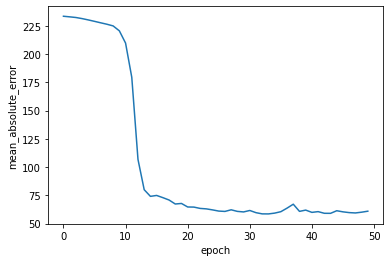

In [ ]:
print(history.history.keys())
plt.plot(History.history['mean_absolute_error'])
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')

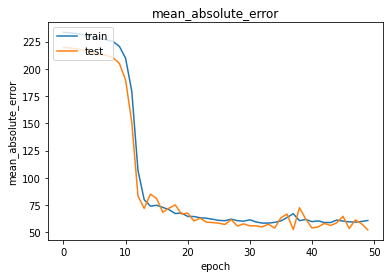

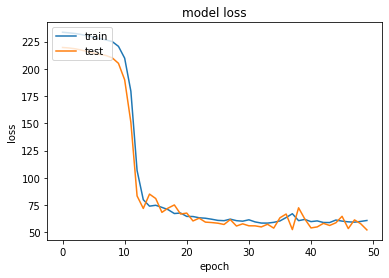

In [ ]:
plt.plot(History.history['mean_absolute_error'])
plt.plot(History.history['val_mean_absolute_error'])
plt.title('mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 # summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
!pip3 install keras
!pip3 install ann_visualizer
!pip install graphviz

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=022d99853aa0f6a9b8fd2feb4dc2625200506b70d70c61f5ca7b638b04a16e06
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


In [ ]:
from ann_visualizer.visualize import ann_viz;

ann_viz(NN_model, view=True, title="test", filename="visualized")